# Overview

This nootebook shows how to study the dependence of the optimal gain value of the model on:
- the type of group setting (single agent, homogeneous group and heterogeneous group);
- the task switching rate of the simulation environment;
- the number of group members receiving the external task cue.

#### 1. Import the necessary libraries and functions.

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from mentevo import Experiment
from mentevo import compute_performance, gaussian_g_vector

In [2]:
# function to define the dimension of the figures
def set_size(w, h):
  plt.figure(figsize=(w, h))

#### 2. Study of the Optimal Gain Value for a Single Agent

As a first experiment, we simulate and compute the performance of a single agent with different gain values, in settings with different number of task switches, while keeping fix the total time of the simulations. The goal of this experiment is to study how the optimal gain changes with the task switching rate of the environment. 

The optimal gain value is the value that leads to the best performance of the agent for a certain task switching rate of the environment.

To have a balanced number of blocks for Task 1 and Task 2, choose even number_of_switches!

In [3]:
DATA1 = {} #initialize the dictionary to store the data

for number_of_switches in [2, 4, 6, 8, 10, 12, 14, 16]: # loop over the chosen number of switches
  DATA1[number_of_switches] = {}

  for g in np.linspace(0.1, 8.0, 100): # loop over the chosen values of gain

    experiment = Experiment(number_of_agents=1,
                            number_of_tasks=2,
                            communication_graph=None,
                            task_graph=None,
                            g=np.array([g]),
                            initial_steps=200,
                            total_time=4_200,
                            number_of_switches=number_of_switches,
                            number_of_informed=None)

    simulation_results = experiment.solve() # solve the experiment
    scores = compute_performance(experiment, simulation_results)
    score = scores[1] 

    DATA1[number_of_switches][g] = score # store the agent performance in the dictionary

best_g_data1 = [] #initialize the list to store the best g for each number of switches

for number_of_switches in DATA1.keys(): 
  # look for the best keys
  best_g = max(DATA1[number_of_switches], key=DATA1[number_of_switches].get)
  best_g_data1.append((number_of_switches, best_g))

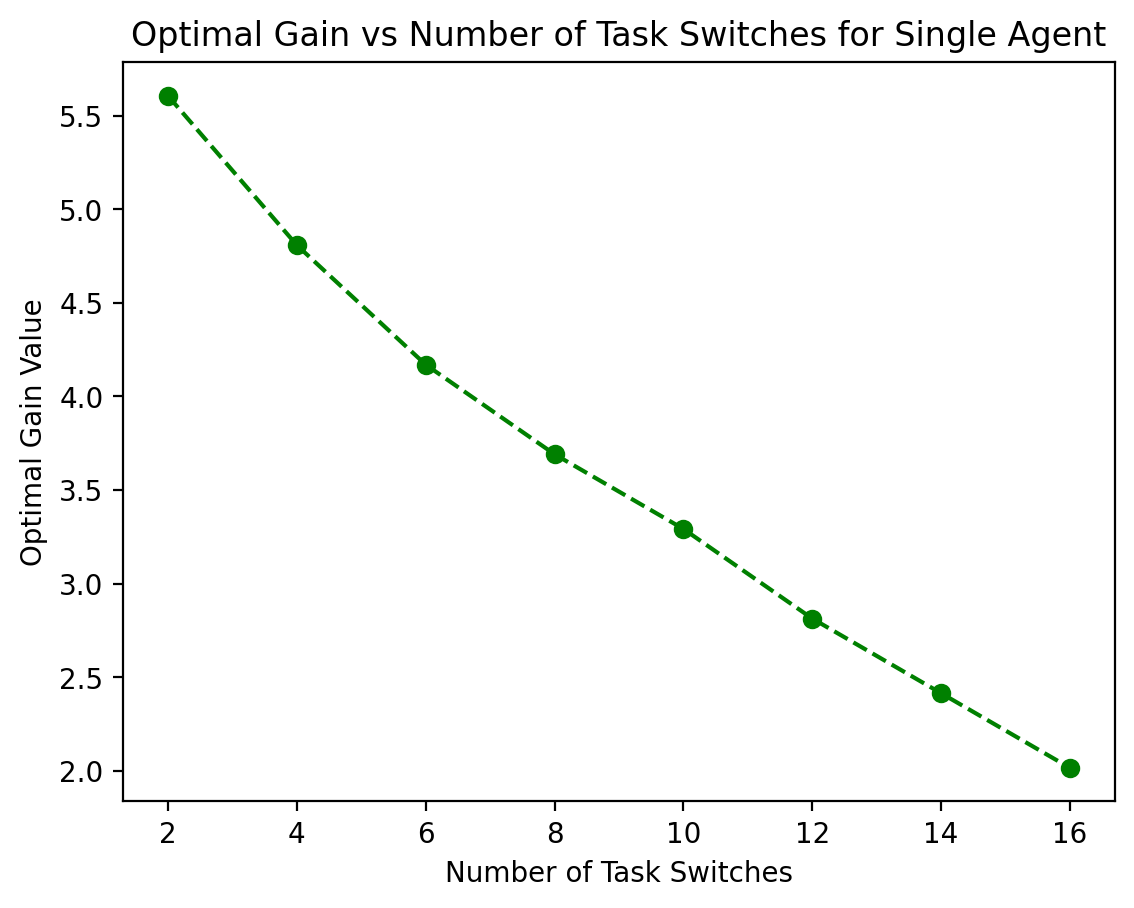

In [8]:
x_vals, y_vals = zip(*best_g_data1)
# x_vals = np.array(x_vals) / (experiment1.total_time - experiment1.initial_steps); this line is to plot the rate of task switching
plt.plot(x_vals, y_vals, color='green', linestyle='--', marker='o') 

plt.xlabel("Number of Task Switches") 
plt.ylabel("Optimal Gain Value")
plt.title("Optimal Gain vs Number of Task Switches for Single Agent")
plt.show()

Here we can see that the optimal gain value decreases with an increase in the task switching rate (increase in the number of task switches).

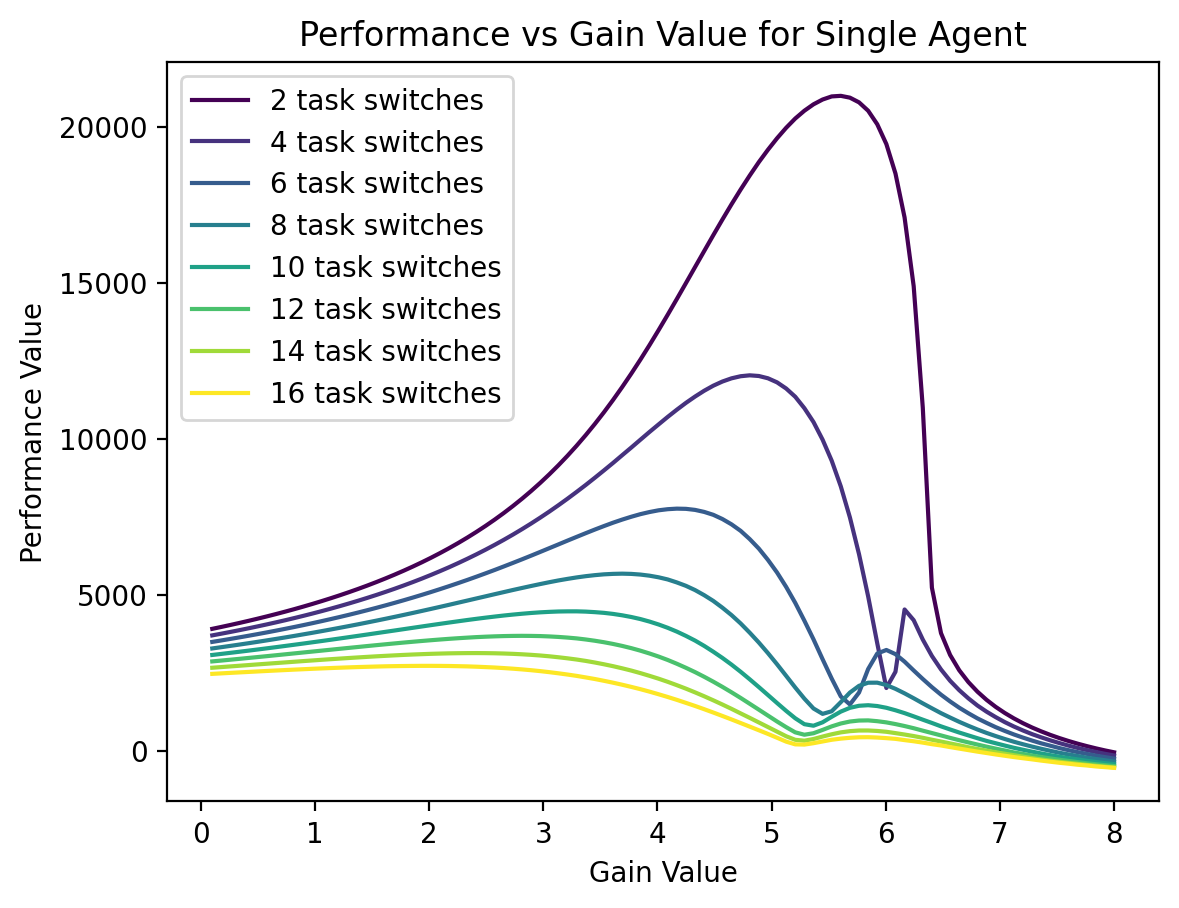

In [9]:
cmap = plt.get_cmap("viridis")

s_min, s_max = min(DATA1.keys()), max(DATA1.keys())  # get min and max values of number of switches

for s in DATA1.keys():
  normalized_s = (s - s_min) / (s_max - s_min)  # normalize to range [0,1] to create a color gradient
  plt.plot(list(DATA1[s].keys()), list(DATA1[s].values()), label=f"{s} task switches", color=cmap(normalized_s))

plt.xlabel("Gain Value") 
plt.ylabel("Performance Value")
plt.title("Performance vs Gain Value for Single Agent")
plt.legend()
plt.show()

Here we can see directly the performance values for all the tested gain values, for all the different simulation settings (different number of task switches).

#### 2. Study of the Optimal Gain Value for an Homogeneous Group

Now instead we simulate and compute the performance of a homogeneous group of 4 agents with different gain values (all the group members have equal gains), in settings with different number of task switches, while keeping fix the total time of the simulations. The goal of this experiment is still to study how the optimal gain changes with the task switching rate of the environment, but this time we also want to test how it depends on the number of group members that receive the external task cue. Indeed, in this experiment we also change the parameter **number_of_informed**.

The optimal gain value is the value that leads to the best group performance for a certain task switching rate of the environment.

In [10]:
DATA2 = {} #initialize the dictionary to store the data

for number_of_informed in [1, 2, 3, 4]: # loop over the chosen number of informed agents
  DATA2[number_of_informed] = {}
  for number_of_switches in [2, 4, 6, 8, 10, 12, 14, 16]: # loop over the chosen number of switches
    DATA2[number_of_informed][number_of_switches] = {}

    for g in np.linspace(0.1, 10.0, 100): # loop over the chosen values of gain

      experiment = Experiment(number_of_agents=4,
                              number_of_tasks=2,
                              communication_graph=None,
                              task_graph=None,
                              g=np.array([g, g, g, g]),
                              initial_steps=200,
                              total_time=4_200,
                              number_of_switches=number_of_switches,
                              number_of_informed=number_of_informed)

      simulation_results = experiment.solve() # solve the experiment
      scores = compute_performance(experiment, simulation_results)
      score = scores[1]

      DATA2[number_of_informed][number_of_switches][g] = score # store the group performance in the dictionary

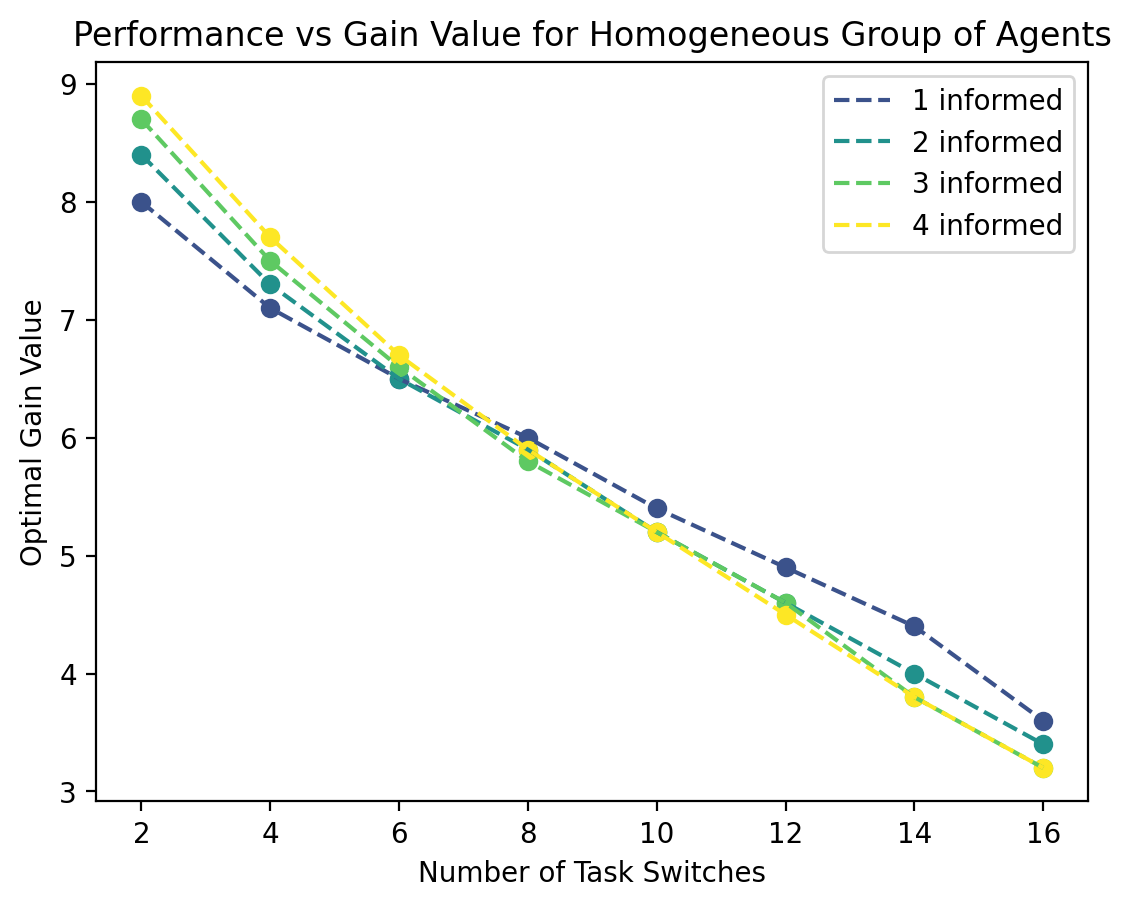

In [12]:
cmap = plt.get_cmap("viridis") # get the colormap

number_of_informed = 1

for number_of_informed in DATA2.keys(): # loop over the number of informed agents
  g_curve = [] #initialize the list to store the best g for each number of switches

  for number_of_switches in DATA2[number_of_informed].keys(): # loop over the number of switches
    # look for the best keys
    best_g = max(DATA2[number_of_informed][number_of_switches], key=DATA2[number_of_informed][number_of_switches].get) 
    g_curve.append((number_of_switches, best_g)) # store the best g for each number of switches

  plt.plot([x for x,y in g_curve], [y for x,y in g_curve], color=cmap(number_of_informed/4.0), 
           alpha=1.0, linestyle="--", label=f"{number_of_informed} informed") # plot the curve
  for x, y in g_curve:
    plt.scatter(x, y, color=cmap(number_of_informed/4.0), alpha=1.0) # plot the points

plt.legend()
plt.xlabel("Number of Task Switches")
plt.ylabel("Optimal Gain Value")
plt.title("Performance vs Gain Value for Homogeneous Group of Agents")
plt.show()

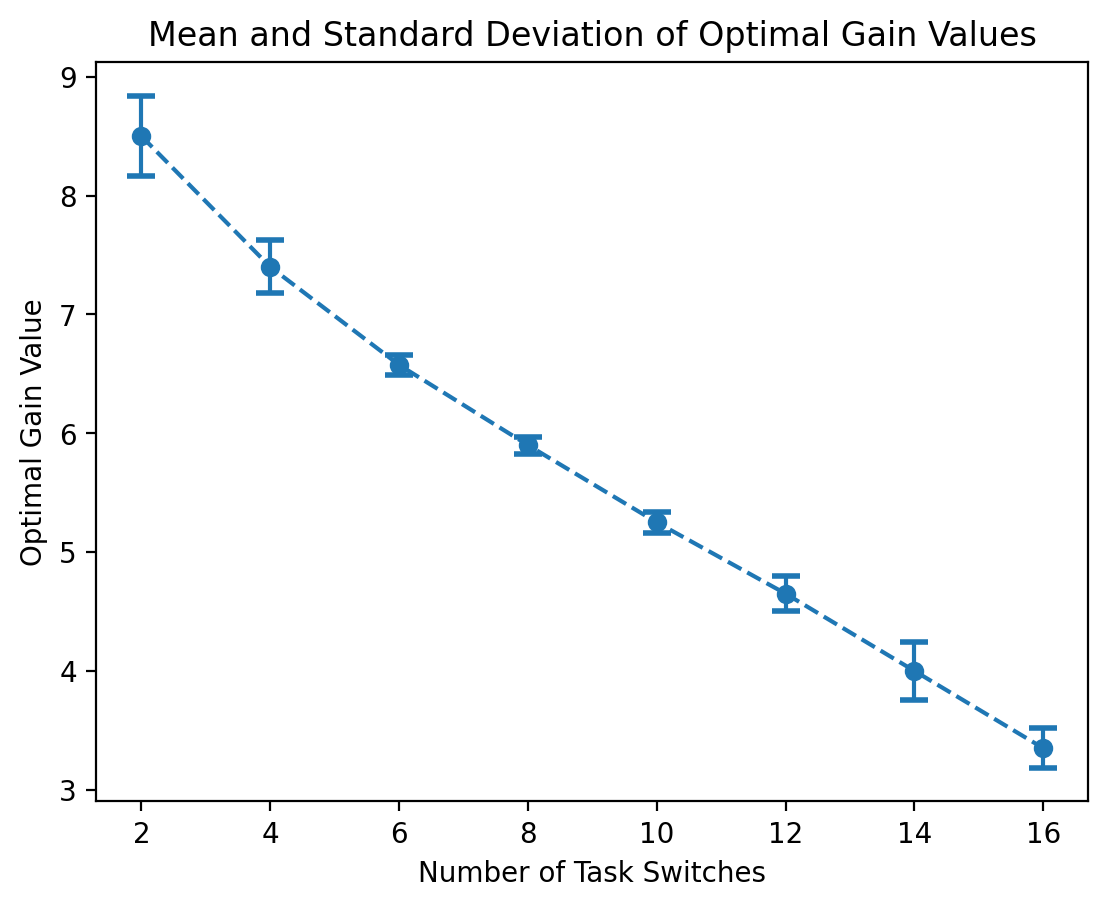

In [13]:
mean_values1 = [] #initialize the list to store the mean values
std_values1 = [] #initialize the list to store the standard deviation values

for number_of_switches in [2, 4, 6, 8, 10, 12, 14, 16]: #iterate over the number of switches
    gains = []
    for number_of_informed in DATA2.keys(): #iterate over the number of informed agents
        best_g = max(DATA2[number_of_informed][number_of_switches], key=DATA2[number_of_informed][number_of_switches].get)
        gains.append(best_g) #append the best gain value to the list
    mean_values1.append(np.mean(gains)) #append the mean value to the list
    std_values1.append(np.std(gains)) #append the standard deviation value to the list

x_vals = [2, 4, 6, 8, 10, 12, 14, 16]

plt.errorbar(x_vals, mean_values1, yerr=std_values1, fmt='--o', capsize=5, capthick=2) 
plt.xlabel("Number of Task Switches")
plt.ylabel("Optimal Gain Value")
plt.title("Mean and Standard Deviation of Optimal Gain Values")
plt.show()

Here, for every diferent number of task switches, we aggregated the data for the different numbers of agent informed, using the mean value and the associated standard deviation. Even in this case, the optimal gain decreases with an increase in the task switching rate of the simulation environment.

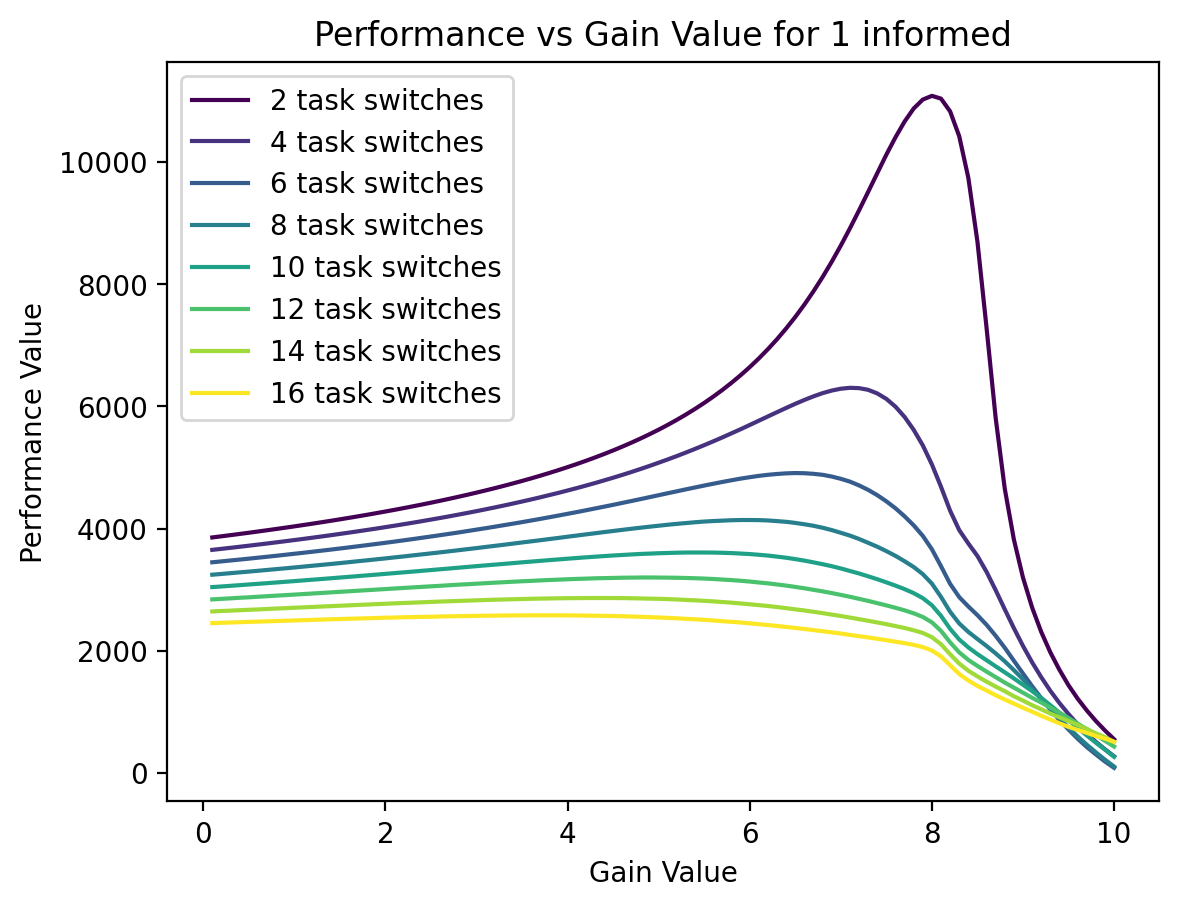

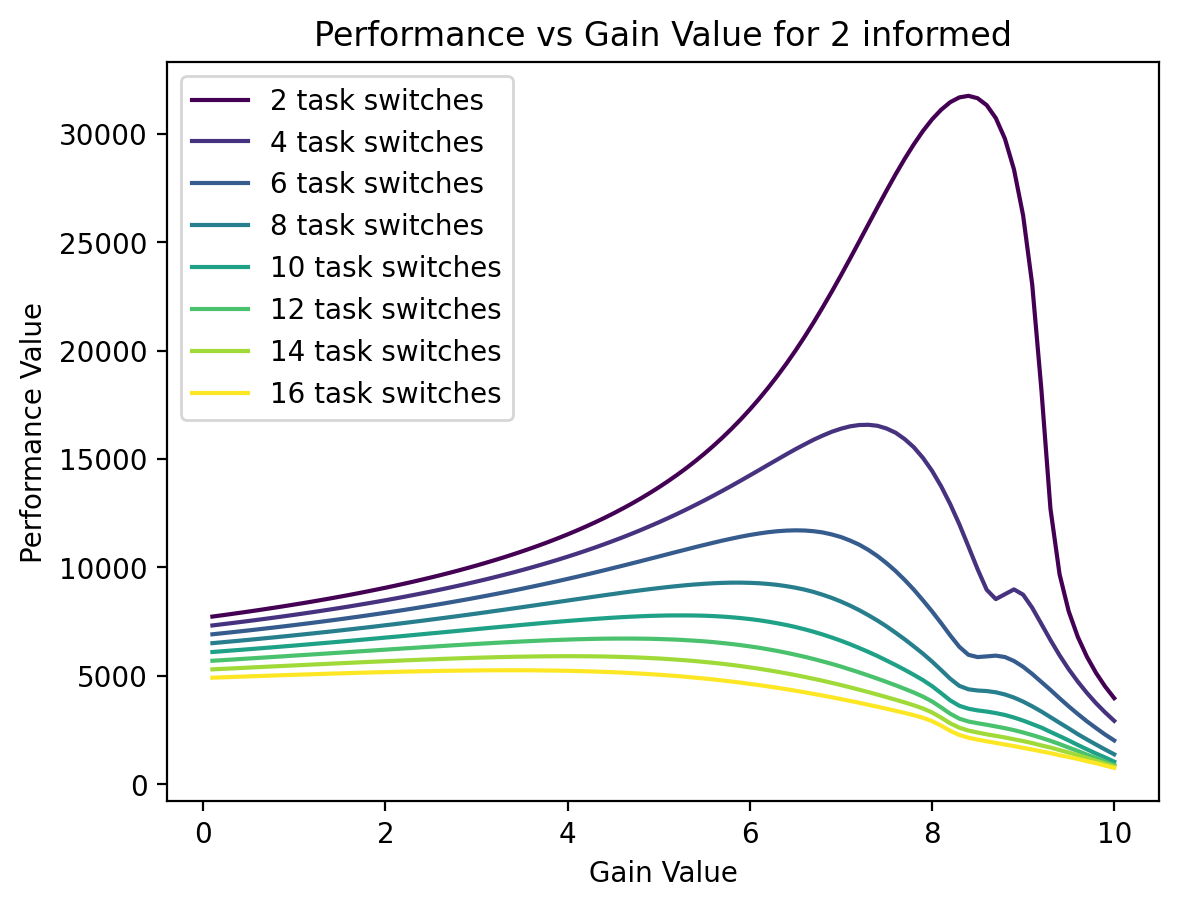

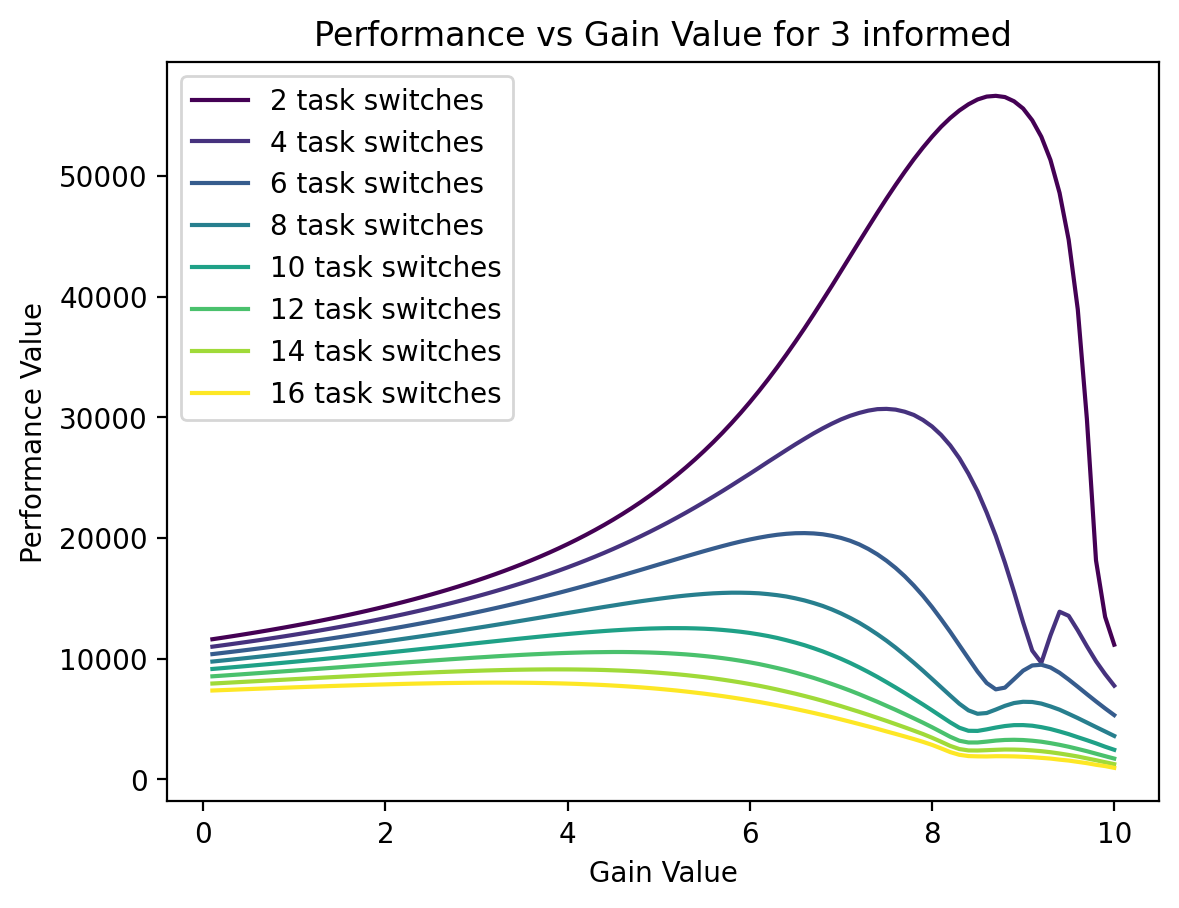

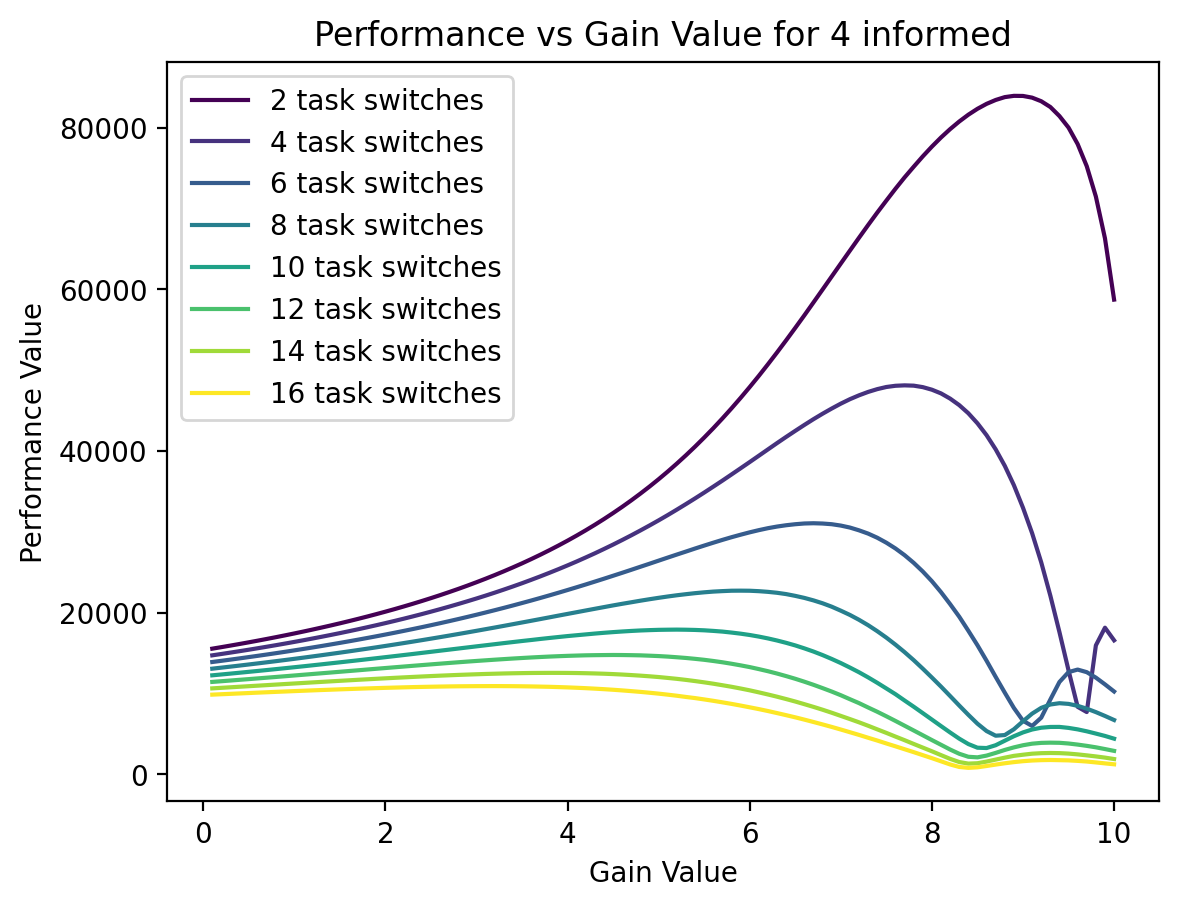

In [14]:
cmap = plt.get_cmap("viridis", 8)  # get a colormap with 8 discrete colors

for number_of_informed in DATA2.keys():

  s_min, s_max = min(DATA2[number_of_informed].keys()), max(DATA2[number_of_informed].keys())  # get min and max values of number of switches

  for s in DATA2[number_of_informed].keys():
    normalized_s = (s - s_min) / (s_max - s_min)  # normalize to range [0,1] to create a color gradient
    plt.plot(list(DATA2[number_of_informed][s].keys()), list(DATA2[number_of_informed][s].values()),
             label=f"{s} task switches", color=cmap(int(normalized_s * 7)))  # use discrete color

  plt.xlabel("Gain Value") 
  plt.ylabel("Performance Value")
  plt.title("Performance vs Gain Value for " f"{number_of_informed} informed")
  plt.legend()
  plt.show()

#### 3. Study of the Optimal Gain Value for an Heterogeneous Group

Finally we simulate and compute the performance of heterogeneous groups of 4 agents with different gain vectors (all the group members have different gains), in settings with a different number of task switches, while keeping fix the total time of the simulations, and a different number of agents informed. The goal of this experiment is to study how the optimal gain changes with the task switching rate of the environment and with the number of group members that receive the external task cue. 

In this experiment, for every different value of gain, 40 heterogeneous groups are created and simulated, each of which has a diverse gain vector. This is to prevent the result from depending too much on the single gain vector extraction. 
Every gain vector is extracted from a Gaussian distribution with mean equal to the chosen gain values and a coefficient of variation of 0.5, and we ensure that all these vectors have same average value (corresponding to the mean value of the distribution). This is to isolate the effect of heterogeneity.

The optimal gain value is the value that leads to the best average group performance for a certain task switching rate of the environment.

!! This cell takes around 25 minutes to run. The number 40 has been chosen for simplicity; a higher number leads to more precise results but takes more time to run.

In [15]:
DATA3 = {} #initialize the dictionary to store the data

for number_of_informed in tqdm([1, 2, 3, 4], desc="Informed Agents", dynamic_ncols=True, position=0): # loop over the chosen number of informed agents
  DATA3[number_of_informed] = {}
  for number_of_switches in tqdm([2, 4, 6, 8, 10, 12, 14, 16], desc="Task Switches", dynamic_ncols=True, position=1): # loop over the chosen number of switches
    DATA3[number_of_informed][number_of_switches] = {}

    for g in np.linspace(0.1, 10.0, 50): # loop over the chosen values of gain
      
      list_score = []
      for i in range(40): # loop over the number of experiments with different gain values for each group
        experiment = Experiment(number_of_agents=4,
                                number_of_tasks=2,
                                communication_graph=None,
                                task_graph=None,
                                g= gaussian_g_vector(g, 0.5*g, 4),
                                initial_steps=200,
                                total_time=4_200,
                                number_of_switches=number_of_switches,
                                number_of_informed=number_of_informed)

        simulation_results = experiment.solve() # solve the experiment
        scores = compute_performance(experiment, simulation_results)
        score = scores[1]
        list_score.append(score) # store the group performance in the list

      score = np.mean(list_score) # compute the mean group performance

      DATA3[number_of_informed][number_of_switches][g] = score # store the mean group performance in the dictionary
      #time.sleep(0.1)  # simulate some delay


Informed Agents: 100%|██████████| 4/4 [25:32<00:00, 383.10s/it]


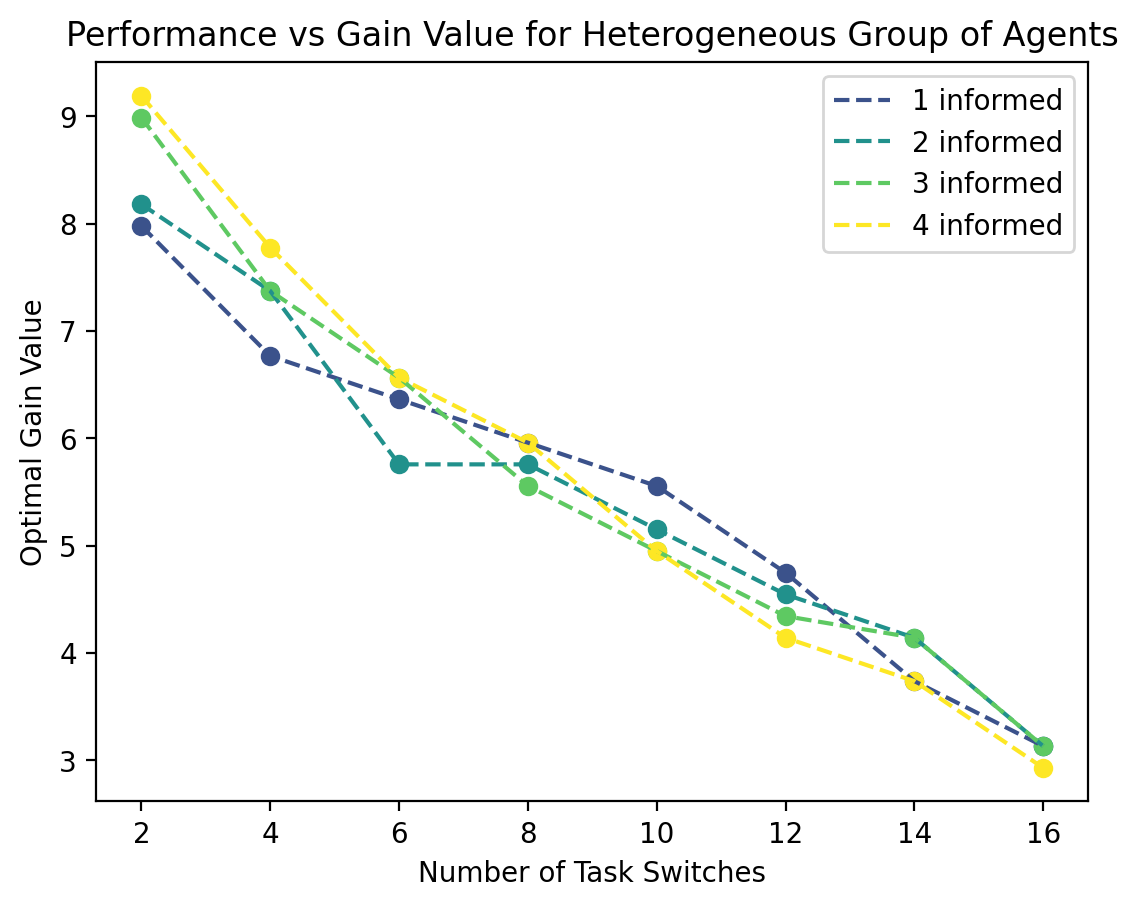

In [16]:
cmap = plt.get_cmap("viridis") # get the colormap

number_of_informed = 1

for number_of_informed in DATA3.keys(): # loop over the number of informed agents
  g_curve = [] #initialize the list to store the best g for each number of switches

  for number_of_switches in DATA3[number_of_informed].keys(): # loop over the number of switches
    # look for the best keys
    best_g = max(DATA3[number_of_informed][number_of_switches], key=DATA3[number_of_informed][number_of_switches].get) 
    g_curve.append((number_of_switches, best_g)) # store the best g for each number of switches

  plt.plot([x for x,y in g_curve], [y for x,y in g_curve], color=cmap(number_of_informed/4.0), 
           alpha=1.0, linestyle="--", label=f"{number_of_informed} informed") # plot the curve
  for x, y in g_curve:
    plt.scatter(x, y, color=cmap(number_of_informed/4.0), alpha=1.0) # plot the points

plt.legend()
plt.xlabel("Number of Task Switches")
plt.ylabel("Optimal Gain Value")
plt.title("Performance vs Gain Value for Heterogeneous Group of Agents")
plt.show()

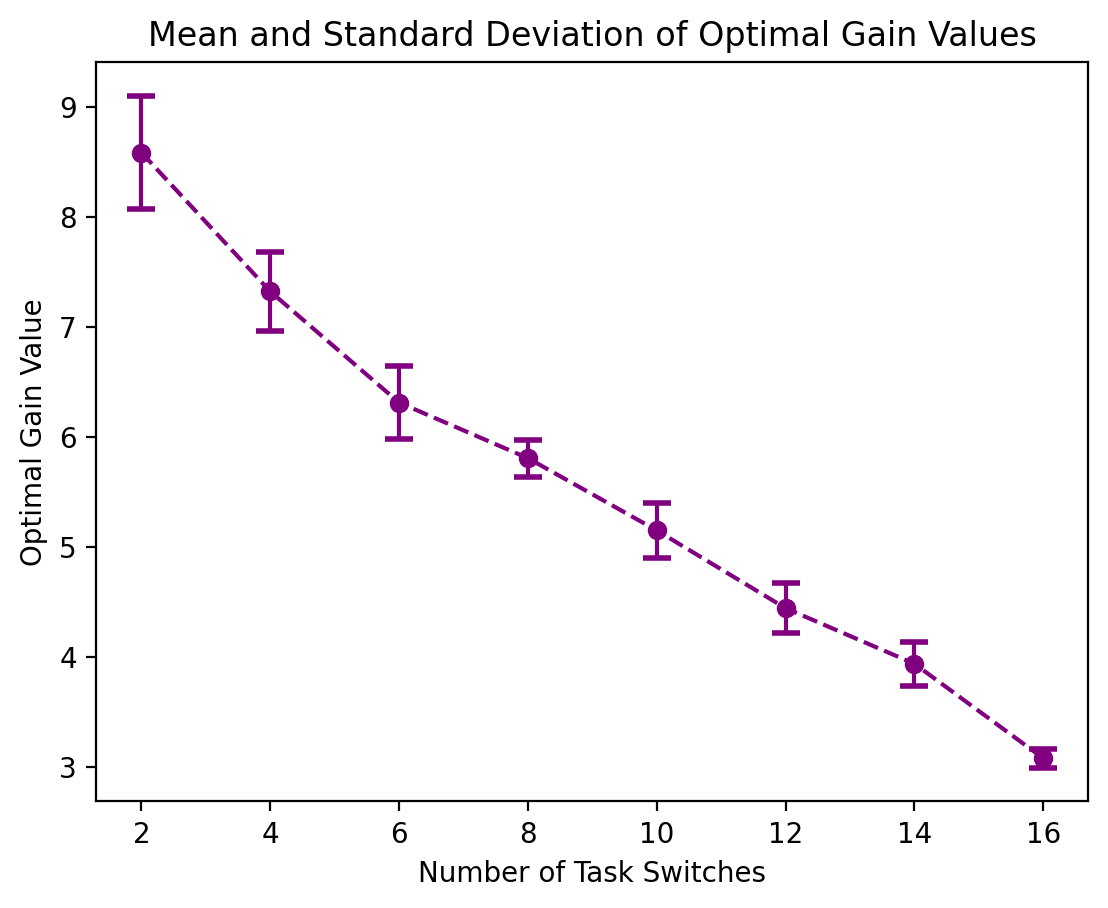

In [17]:
mean_values2 = [] #initialize the list to store the mean values
std_values2 = [] #initialize the list to store the standard deviation values

for number_of_switches in [2, 4, 6, 8, 10, 12, 14, 16]: #iterate over the number of switches
    gains = []
    for number_of_informed in DATA2.keys(): #iterate over the number of informed agents
        best_g = max(DATA3[number_of_informed][number_of_switches], key=DATA3[number_of_informed][number_of_switches].get)
        gains.append(best_g) #append the best gain value to the list
    mean_values2.append(np.mean(gains)) #append the mean value to the list
    std_values2.append(np.std(gains)) #append the standard deviation value to the list

x_vals = [2, 4, 6, 8, 10, 12, 14, 16]

plt.errorbar(x_vals, mean_values2, yerr=std_values2, fmt='--o', capsize=5, capthick=2, color='purple') 
plt.xlabel("Number of Task Switches")
plt.ylabel("Optimal Gain Value")
plt.title("Mean and Standard Deviation of Optimal Gain Values")
plt.show()

We observe the same trend even for the heterogeneous group!

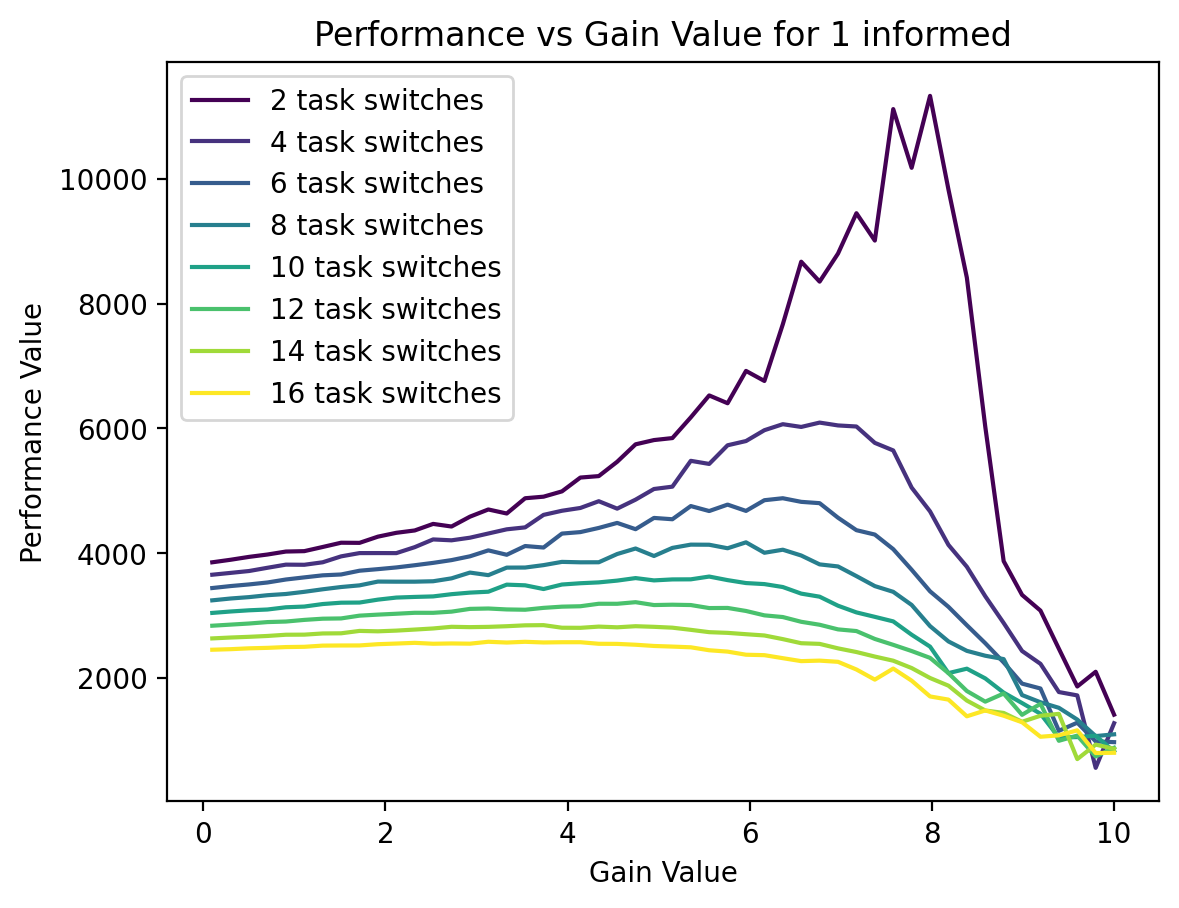

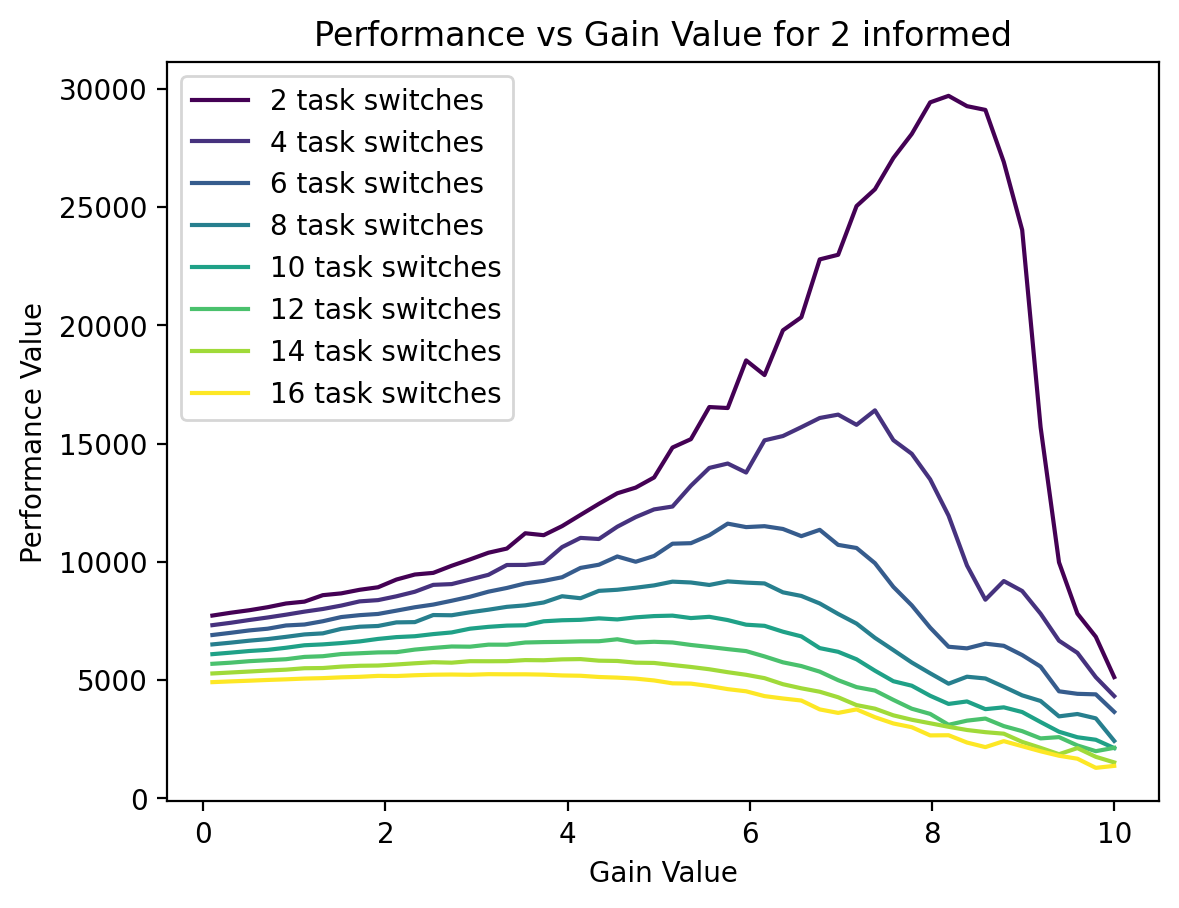

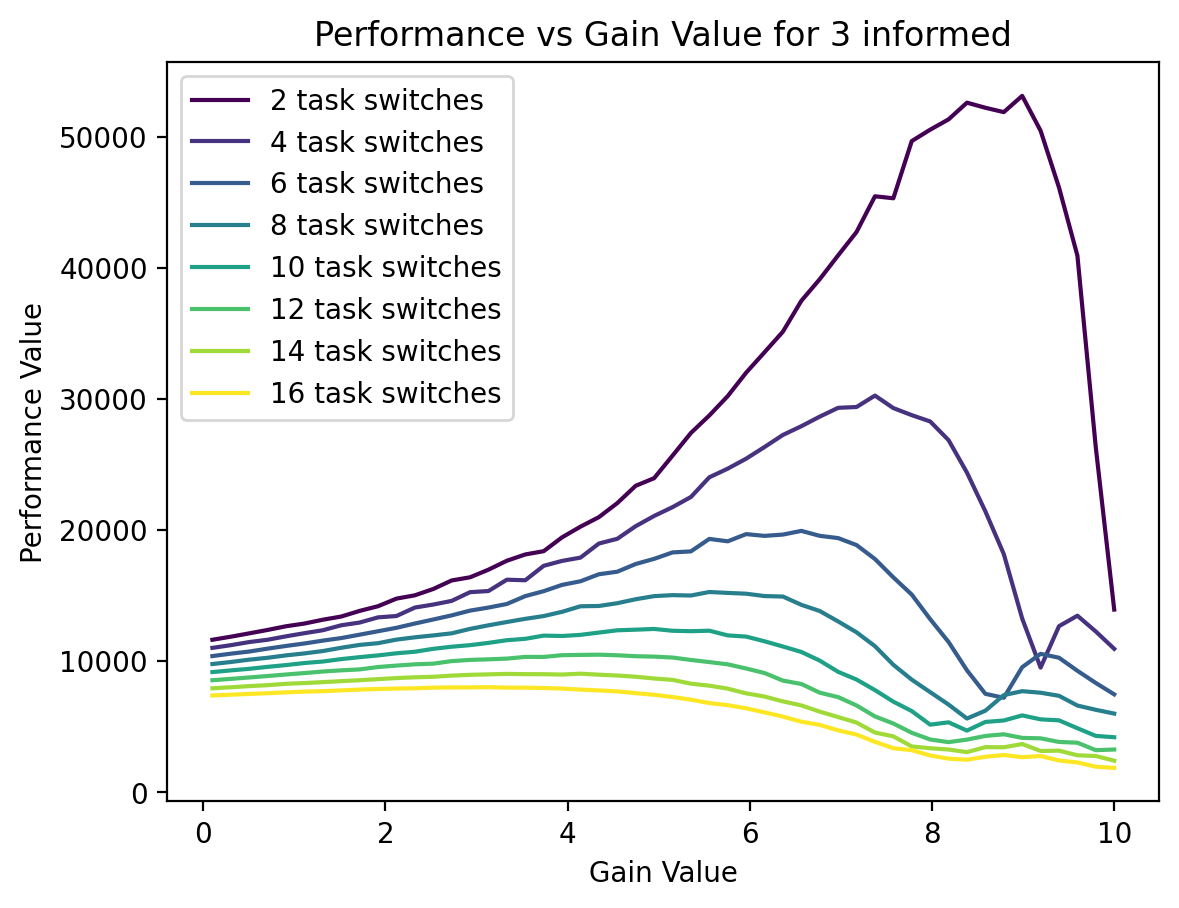

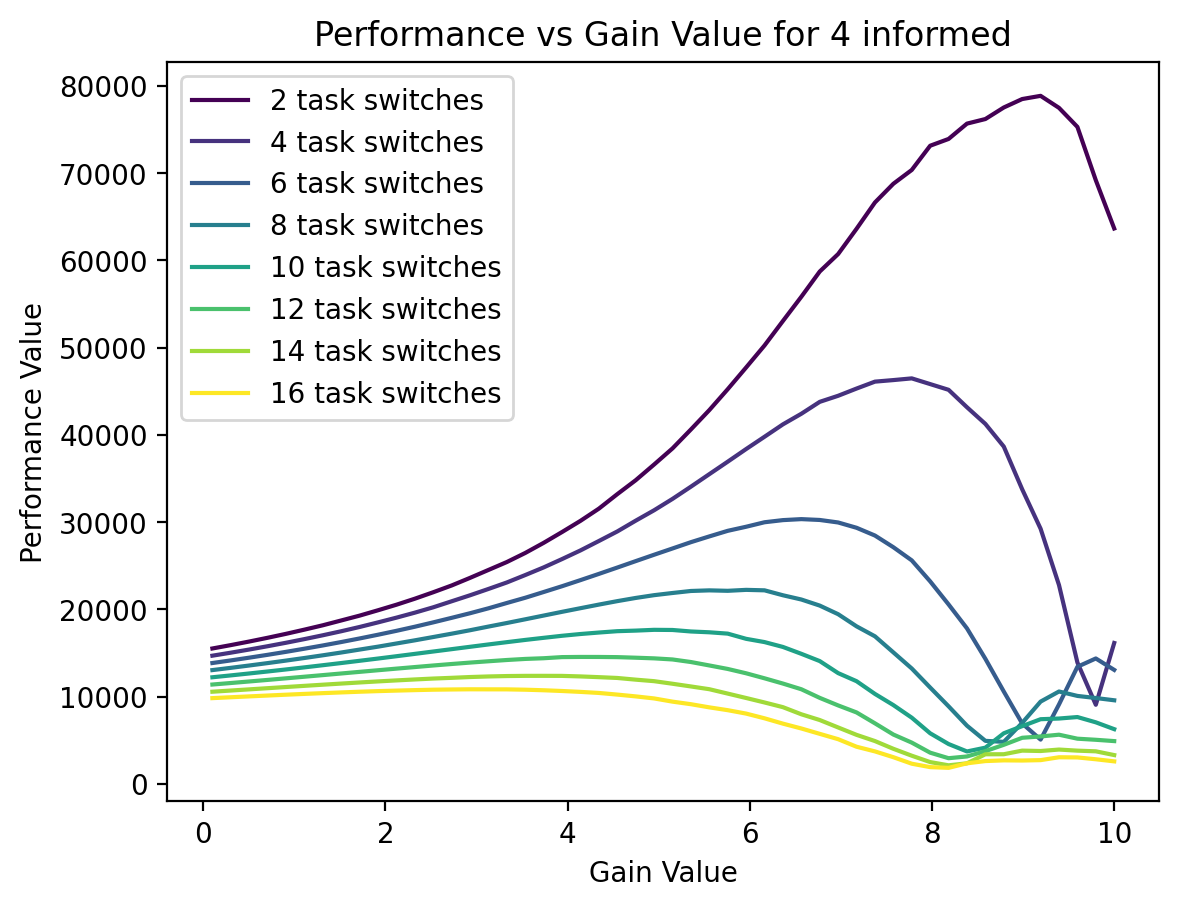

In [18]:
cmap = plt.get_cmap("viridis", 8)  # get a colormap with 8 discrete colors

for number_of_informed in DATA3.keys():

  s_min, s_max = min(DATA3[number_of_informed].keys()), max(DATA3[number_of_informed].keys())  # get min and max values of number of switches

  for s in DATA3[number_of_informed].keys():
    normalized_s = (s - s_min) / (s_max - s_min)  # normalize to range [0,1] to create a color gradient
    plt.plot(list(DATA3[number_of_informed][s].keys()), list(DATA3[number_of_informed][s].values()),
             label=f"{s} task switches", color=cmap(int(normalized_s * 7)))  # use discrete color

  plt.xlabel("Gain Value") 
  plt.ylabel("Performance Value")
  plt.title("Performance vs Gain Value for " f"{number_of_informed} informed")
  plt.legend()
  plt.show()

#### 4. Final Plot

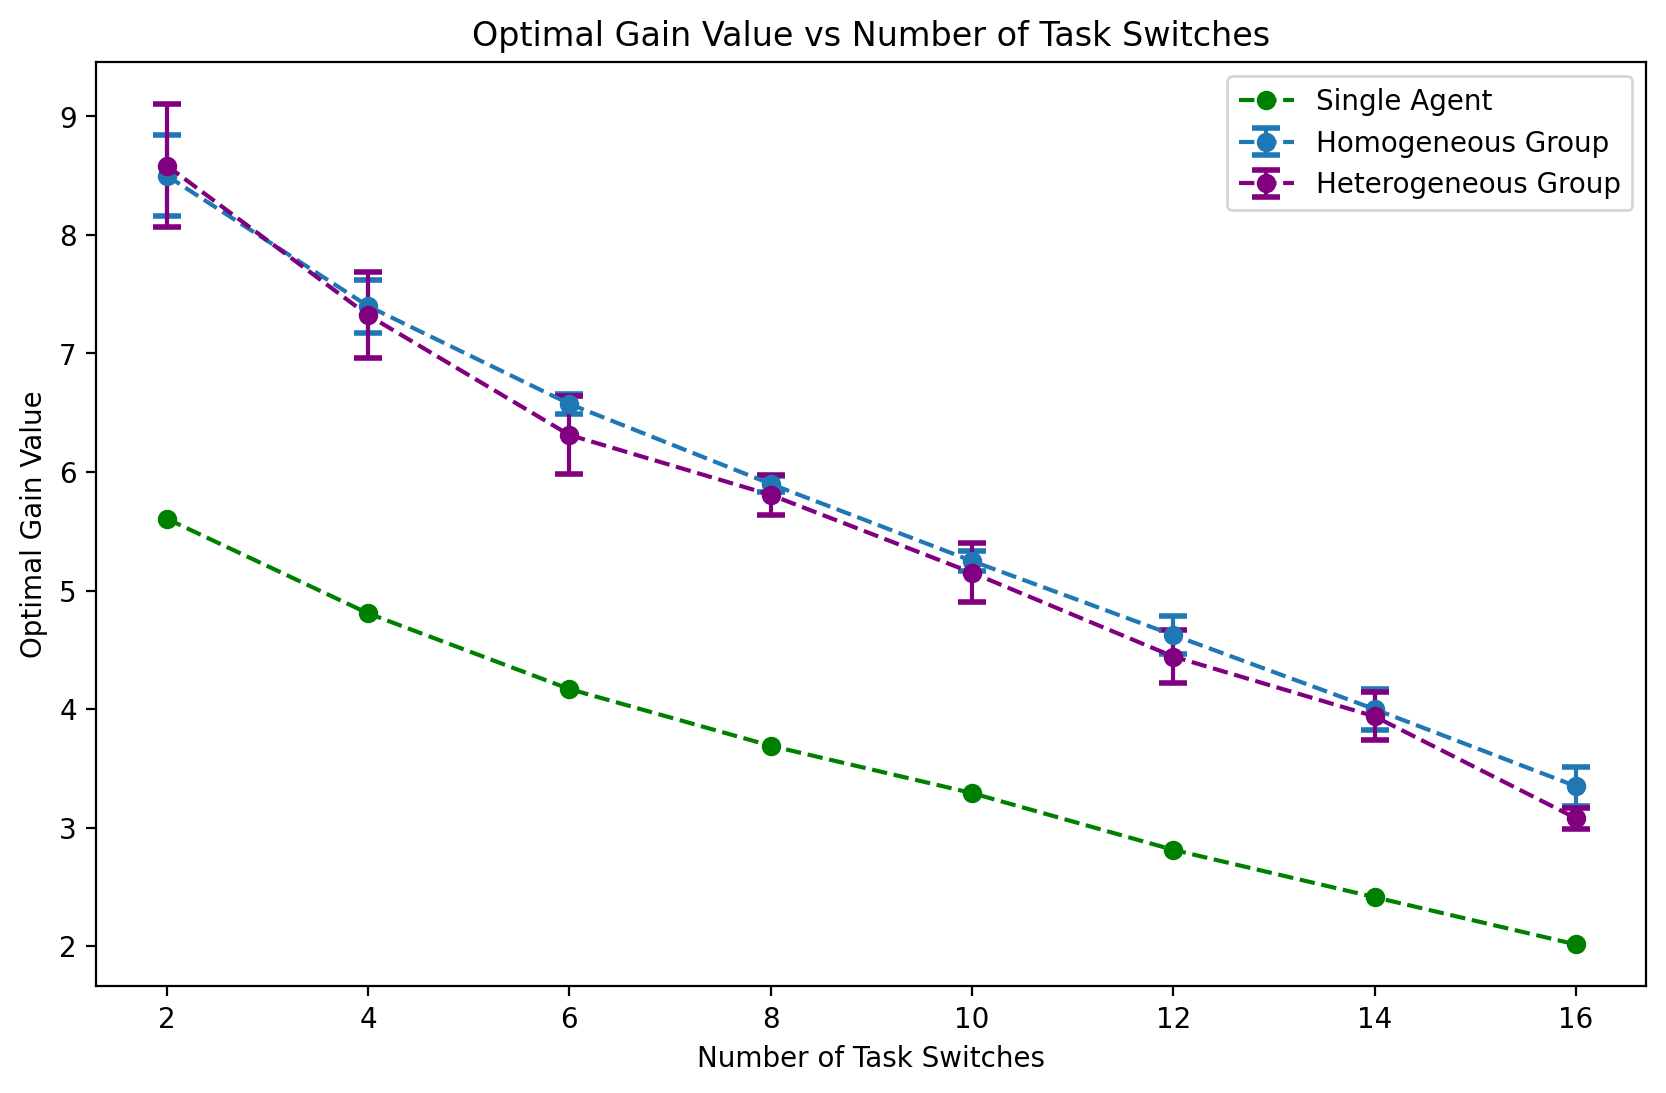

In [20]:
plt.figure(figsize=(10, 6))

# plot for single agent
plt.plot(x_vals, y_vals, color='green', linestyle='--', marker='o', label='Single Agent')

# plot for homogeneous group
plt.errorbar(x_vals, mean_values1, yerr=std_values1, fmt='--o', capsize=5, capthick=2, label='Homogeneous Group') 

# plot for heterogeneous group
plt.errorbar(x_vals, mean_values2, yerr=std_values2, fmt='--o', capsize=5, capthick=2, color='purple', label='Heterogeneous Group') 

plt.xlabel("Number of Task Switches")
plt.ylabel("Optimal Gain Value")
plt.title("Optimal Gain Value vs Number of Task Switches")
plt.legend()
plt.show()

We observe a consistent trend for all 3 group settings: the optimal gain decreases with an increase in the task switching rate of the simulation environment. This means that in environmnets that require more frequent task switches, it's more beneficial to be more flexible at the expense of stability. This shows the trade-off between cognitive stability and flexibility.